# Capstone 3 - Exploratory Data Analysis

Can we predict the electricity load for three cities of Panama, considering meteorologic conditions, holidays, and school schedule?

In [1]:
# Modules importation
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\laurence\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing the data wrangled dataset
data = pd.read_csv(r'C:\Users\laurence\OneDrive\Data Science\Capstone 3\capstone3_data_wrangled.csv')

In [3]:
# Visualization of the dataset
data.head()

,datetime,nat_elec_load,t_toc,h_toc,p_toc,ws_toc,t_san,h_san,p_san,ws_san,t_dav,h_dav,p_dav,ws_dav,holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0.0,0.0,0.0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0.0,0.0,0.0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0.0,0.0,0.0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0.0,0.0,0.0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0.0,0.0,0.0


In [4]:
# Dividing datetime into year, month, day and hour 
data["year"] = pd.DatetimeIndex(data["datetime"]).year
data["month"] = pd.DatetimeIndex(data["datetime"]).month
data["day"] = pd.DatetimeIndex(data["datetime"]).day
data["hour"] = pd.DatetimeIndex(data["datetime"]).hour

In [5]:
# Creating subdatasets with mean values for year, month, day and hour
data_yearly = data.groupby(['year']).mean()
data_yearly = data_yearly.drop(['holiday_ID', 'holiday', 'school', 'month', 'day', 'hour'], axis=1)

data_monthly = data.groupby(['month']).mean()
data_monthly = data_monthly.drop(['holiday_ID', 'holiday', 'school', 'year', 'day', 'hour'], axis=1)

data_daily = data.groupby(['day']).mean()
data_daily = data_daily.drop(['holiday_ID', 'holiday', 'school', 'year', 'month', 'hour'], axis=1)

data_hourly = data.groupby(['hour']).mean()
data_hourly = data_hourly.drop(['holiday_ID', 'holiday', 'school', 'year', 'month', 'day'], axis=1)

In [6]:
# Definition of a function to obtain correlation coefficients of all features (from Stack Overflow)
def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

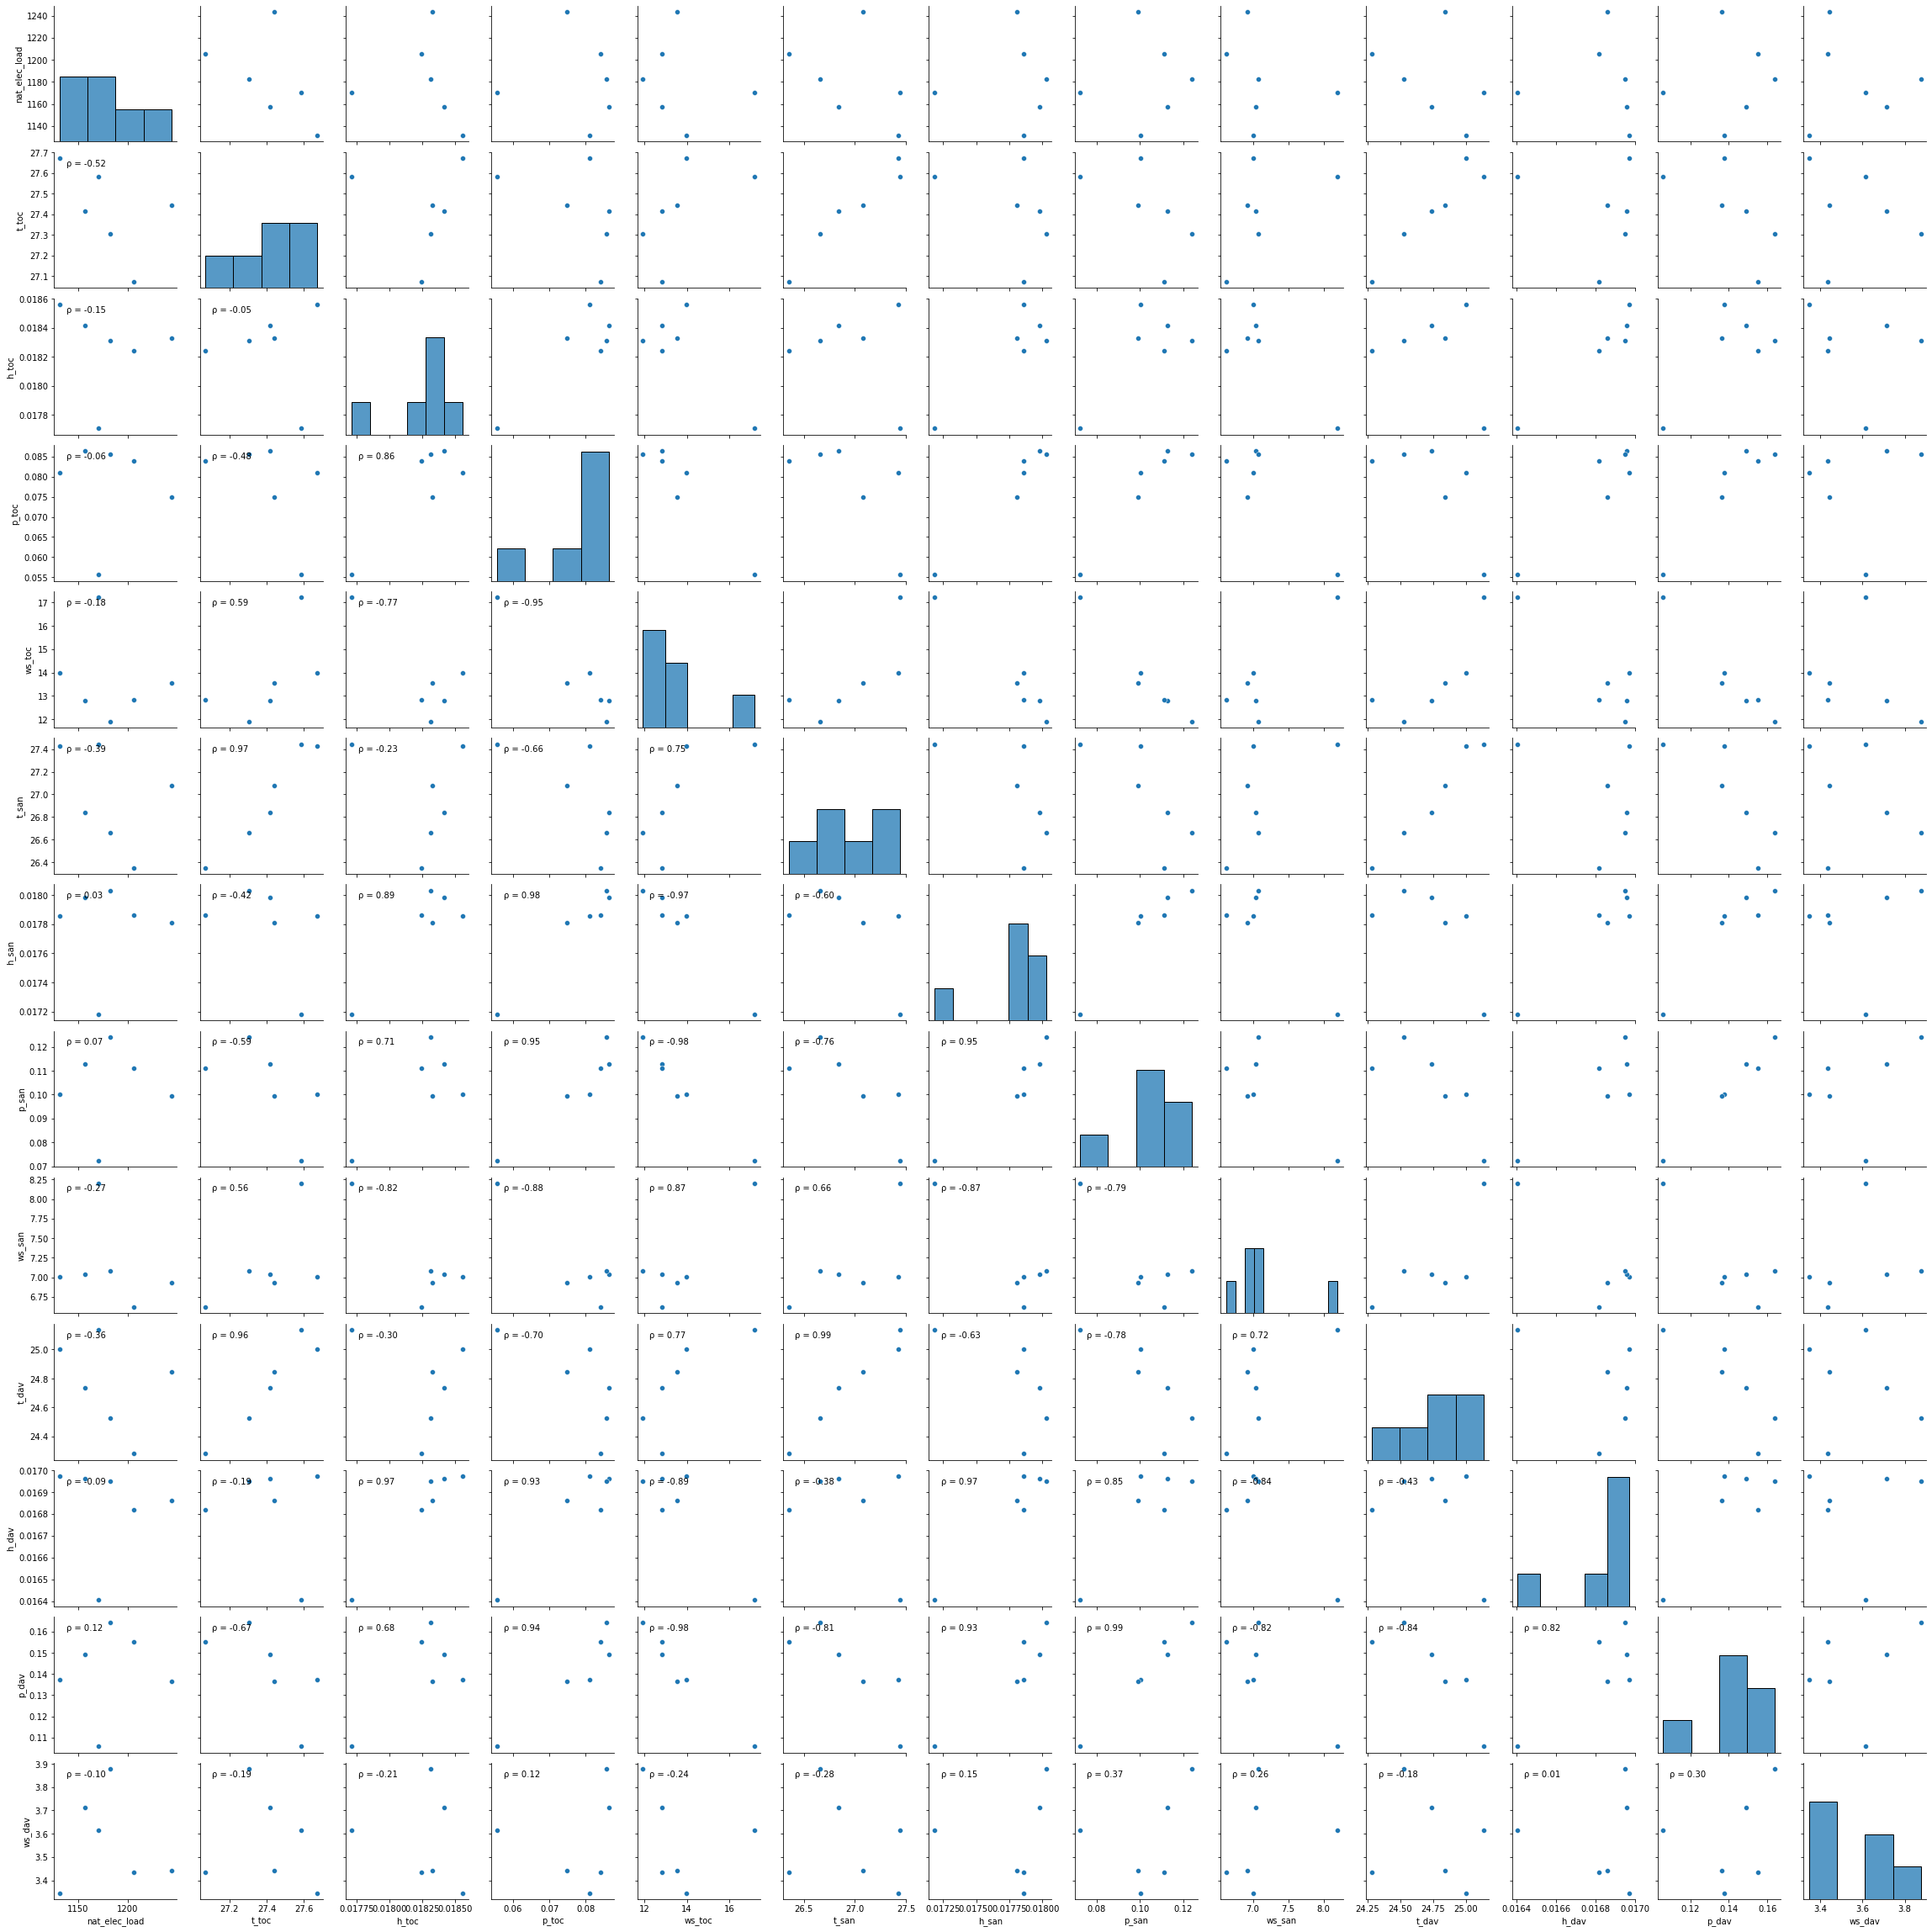

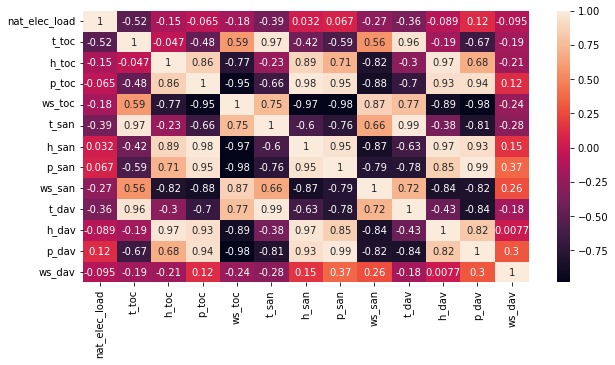

In [7]:
# Visualization of the relation between features yearly
g = sns.pairplot(data_yearly)
g.map_lower(corrfunc)
plt.show()

# Fora better visualization of correlation between features
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(data_yearly.corr(), annot = True, ax = ax)
plt.show()

### Some insights - On a yearly basis:
- Electricity load do not have a significant correlation factor with any feature of the dataset.

- There is a very strong correlation between temperatures in Tocumen and David city (0.96), as well as between Tocumen and Santiago (0.97). The correlation between temperatures of Santiago and David city is even stronger (0.99).

- There is a very strong correlation between humidity levels in Tocumen and David city (0.97), while the correlation between humidity in Tocumen and Santiago is more moderate (0.89). There also is a correlation between humidity levels of Santiago and David city (0.97).

- There is a very strong correlation between precipitations in Tocumen and David City (0.94), as well as between Tocumen and Santiago (0.95). The correlation between Santiago and David city is even stronger (0.99).

- There is no strong correlation between the wind speeds of all 3 cities.

- There is a strong correlations, hampered by the presence of two outliers, between the humidity level in Tocumen and temperature in David (-0.30), and in Santiago (-0.23).

- There is a strong correlation between precipitation and humidity level of all 3 cities (Tocumen: 0.86; Santiago: 0.95; and David City: 0.87).

- There is also a strong correlation between precipitation in Tocumen and humidity levels in David City (0.93) and Santiago (0.98).

- Temperature and precipitation correlate in David City (-0.81).

- There is a correlation between humidity level in Santiago with humidity (0.97) and precipitation (0.93) in David city.

- There is a strong correlation between wind speed in Tocumen and precipitation (-0.98) and humidity level (-0.89) in David city, and a moderate one with it's temperature (-0.77).

- There is a strong correlation between precipitation in Tocumen and wind speed in the same city (-0.95).

- Wind speed in Tocumen do also correlate with wind speed (0.87), precipitation (-0.98), humidity (-0.97) and temperature (0.77) in Santiago.

- There is a moderate correlation between humidity and wind speed in Santiago (-0.87).

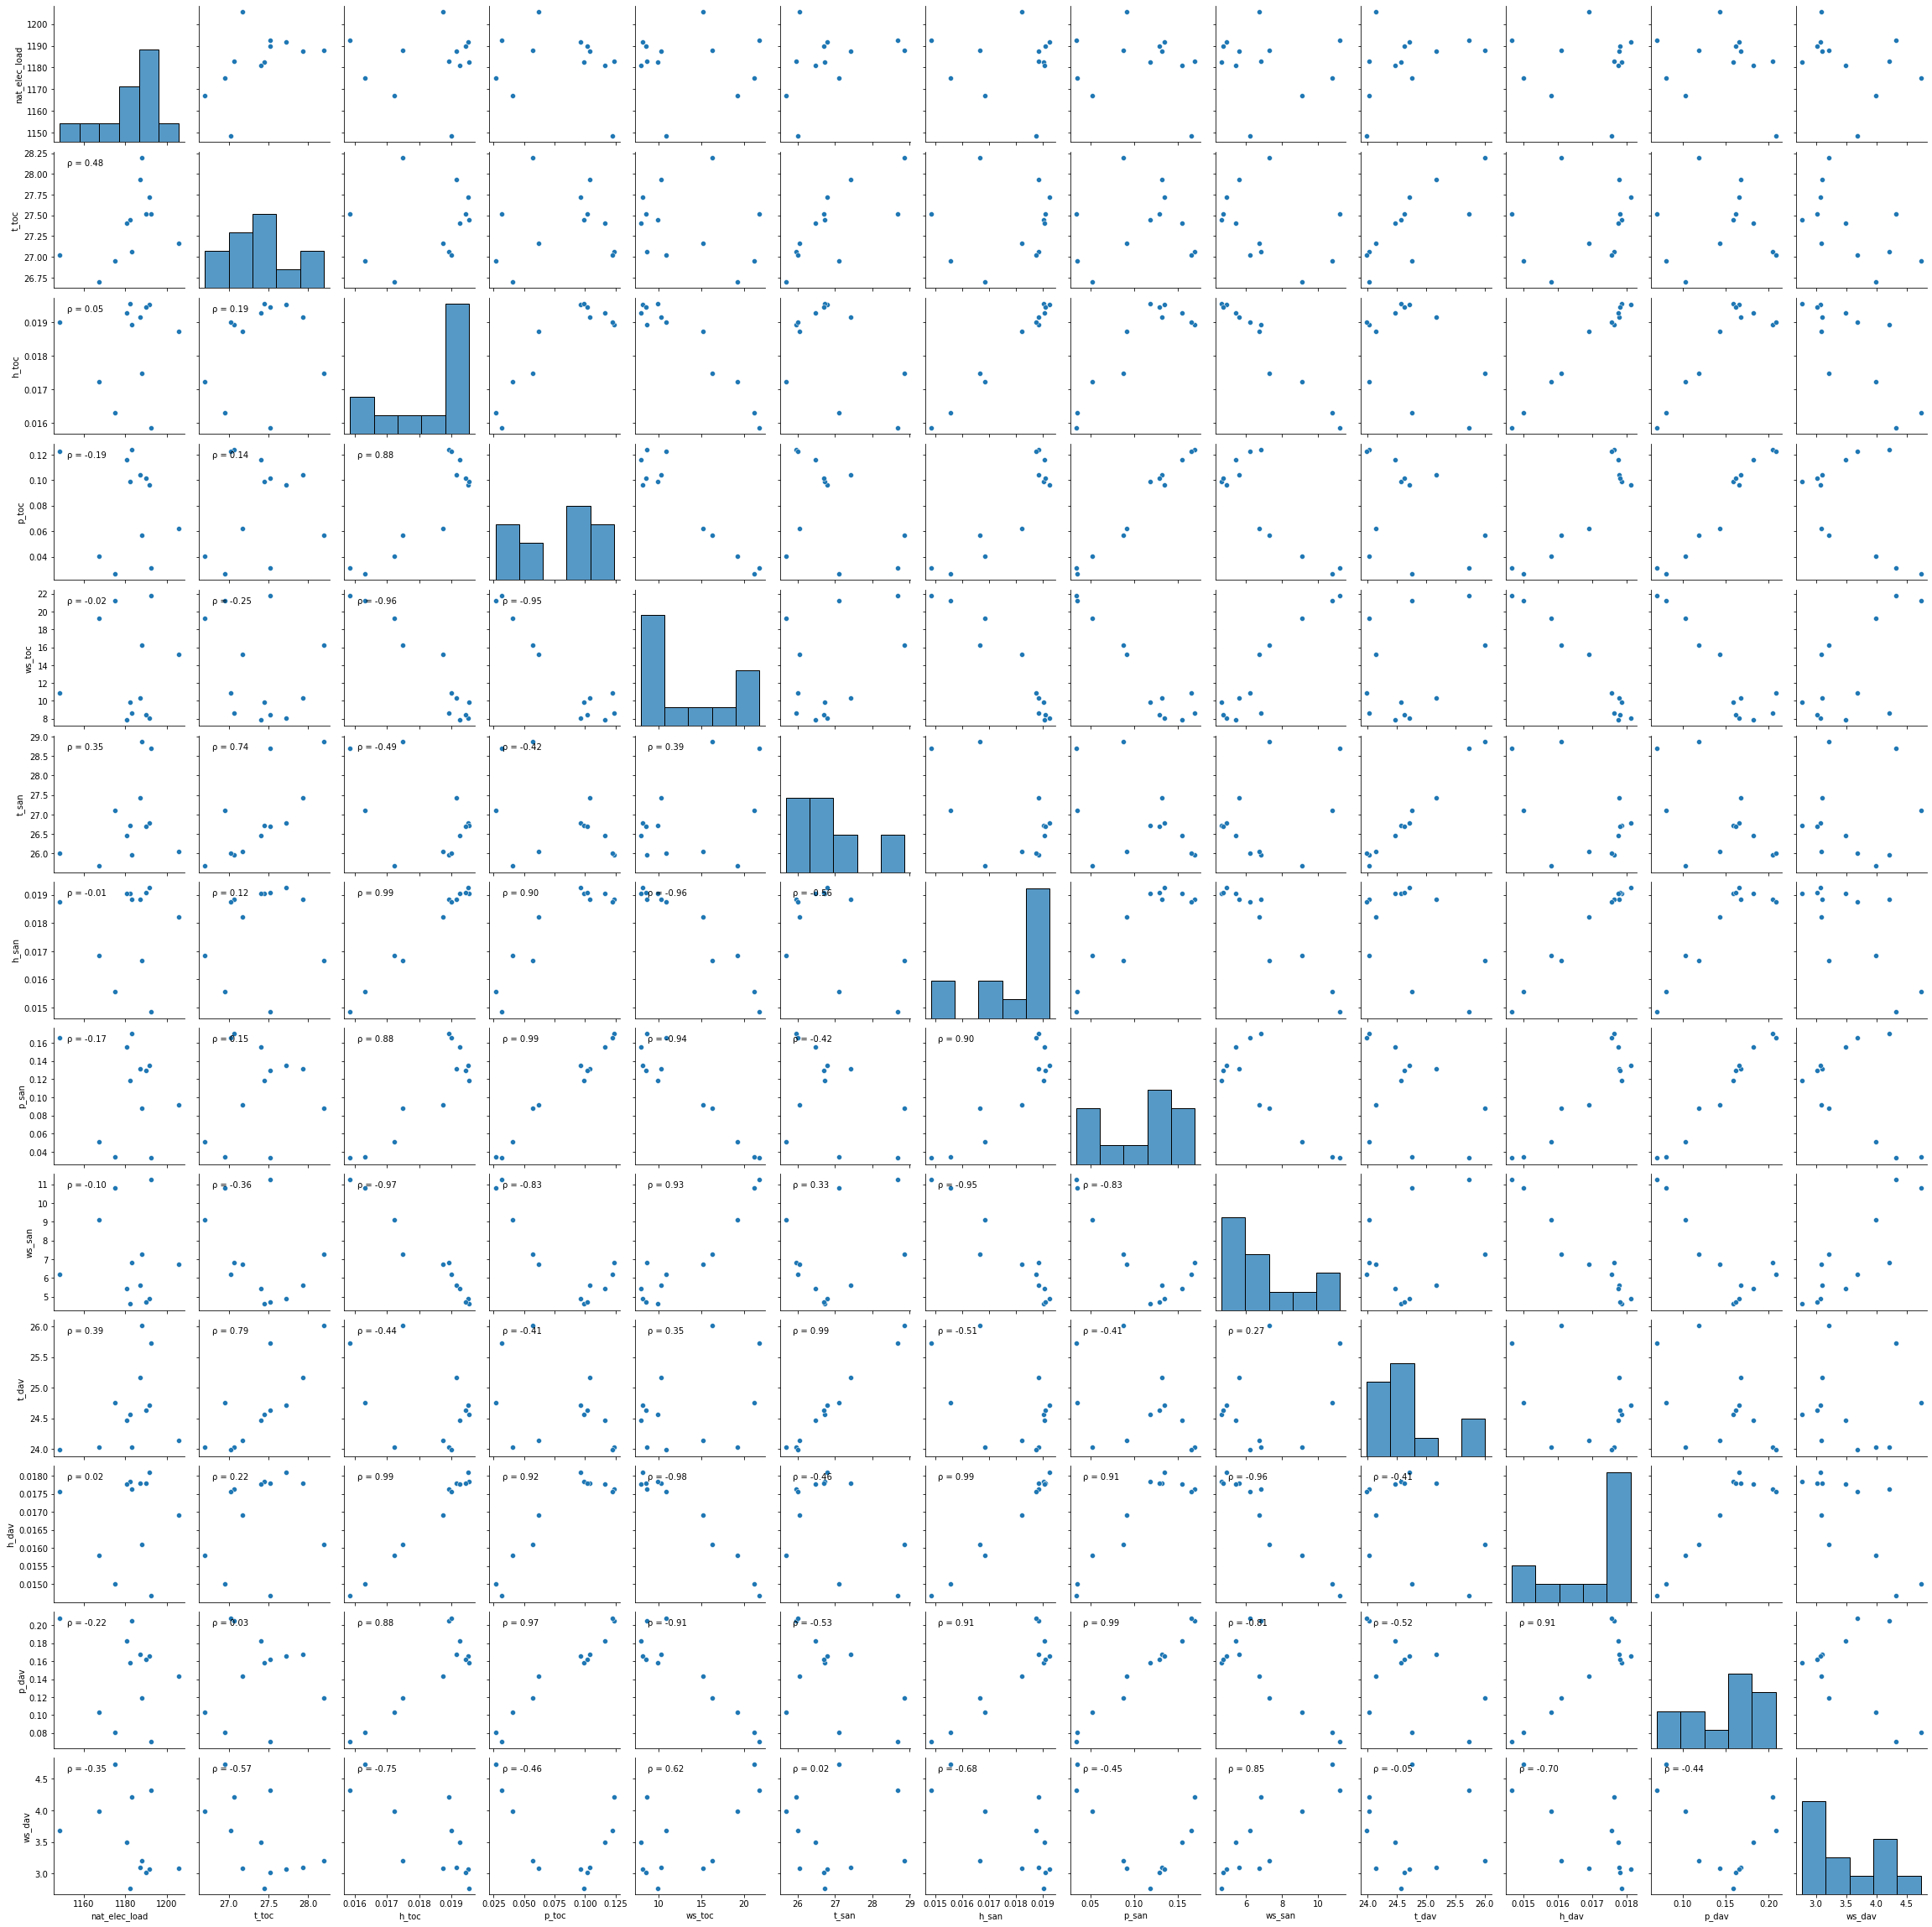

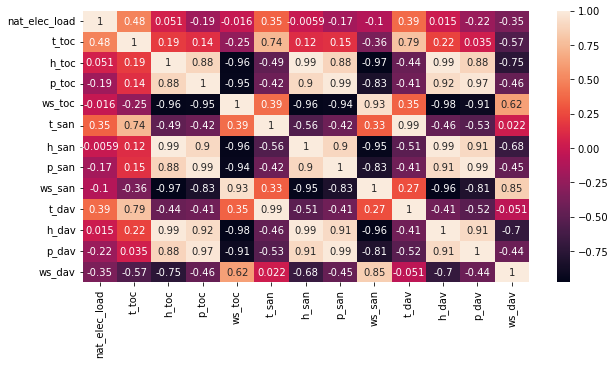

In [8]:
# Visualization of the relation between features monthly
g = sns.pairplot(data_monthly)
g.map_lower(corrfunc)
plt.show()


# Fora better visualization of correlation between features
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(data_monthly.corr(), annot = True, ax = ax)
plt.show()

### Some insights - On a monthly basis:
- Electricity load still do not have a significant correlation factor with any feature of the dataset.

- Compared to the yearly basis, the correlation between temperatures in Tocumen and David city is weaker (0.79), as for the one between Tocumen and Santiago (0.74), both affected by the presence of some outliers. The correlation between temperatures of Santiago and David city is still the strongest (0.99).

- There is a very strong correlation (0.99) between humidity levels in Tocumen and David city, between Tocumen and Santiago, as well as between Santiago and David city.

- There is a sligthly stronger correlation between precipitations in Tocumen and David City (0.97), as well as between Tocumen and Santiago (0.99), while the correlation between Santiago and David city is the same (0.99).

- There is now a strong correlation between Tocumen and Santiago wind speed (0.93), and a moderate one between Santiago and David city (0.85). 

- There is no more correlation between humidity level and temperature in between cities.

- There is still a fair correlation between precipitation and humidity level of all 3 cities, respectively (Tocumen: 0.88; Santiago: 0.90; and David City: 0.91).

- Still in comparison with the yearly basis, the correlation between precipitation in Tocumen and humidity levels in David City (0.92) and Santiago (0.90) is slightly weaken.

- There is no more correlation between temperature and precipitation in David City (-0.52).

- There is still a strong correlation between humidity level in Santiago with humidity (0.99) and precipitation (0.91) in David city.

- There is a strong correlation between wind speed in Tocumen and precipitation (-0.91) and humidity level (-0.98) in David city, but there is no more correlation with it's temperature (0.35).

- The correlation between precipitation in Tocumen and wind speed in the same city (-0.95) is the same.

- Wind speed in Tocumen do also correlate with wind speed (0.93), precipitation (-0.94), humidity (-0.96), but no more with temperature (0.39) in Santiago.

- There is now a strong correlation between humidity and wind speed in Santiago (-0.95).

- There is now a moderate correlation between humidity level in Tocumen and precipitation in David city (0.88).

- There is now also a strong correlation between humidity level in Tocumen and wind speed the same city (-0.96) as well as in Santiago (-0.97). 

- On a monthly basis, we can see that wind speed in Santiago is strongly correlated with humidity level (-0.96) and precipitation (-0.81) in David City. Wind speed in Santiago also show a relation in V shape with precipitation in Tocumen (-0.93).

- Precipitation in Santiago is now correlated with humidity levels in Tocumen (0.88) and David City (0.91). Precipitation in Santiago also show a relation in V shape with wind speed in David City (-0.45).

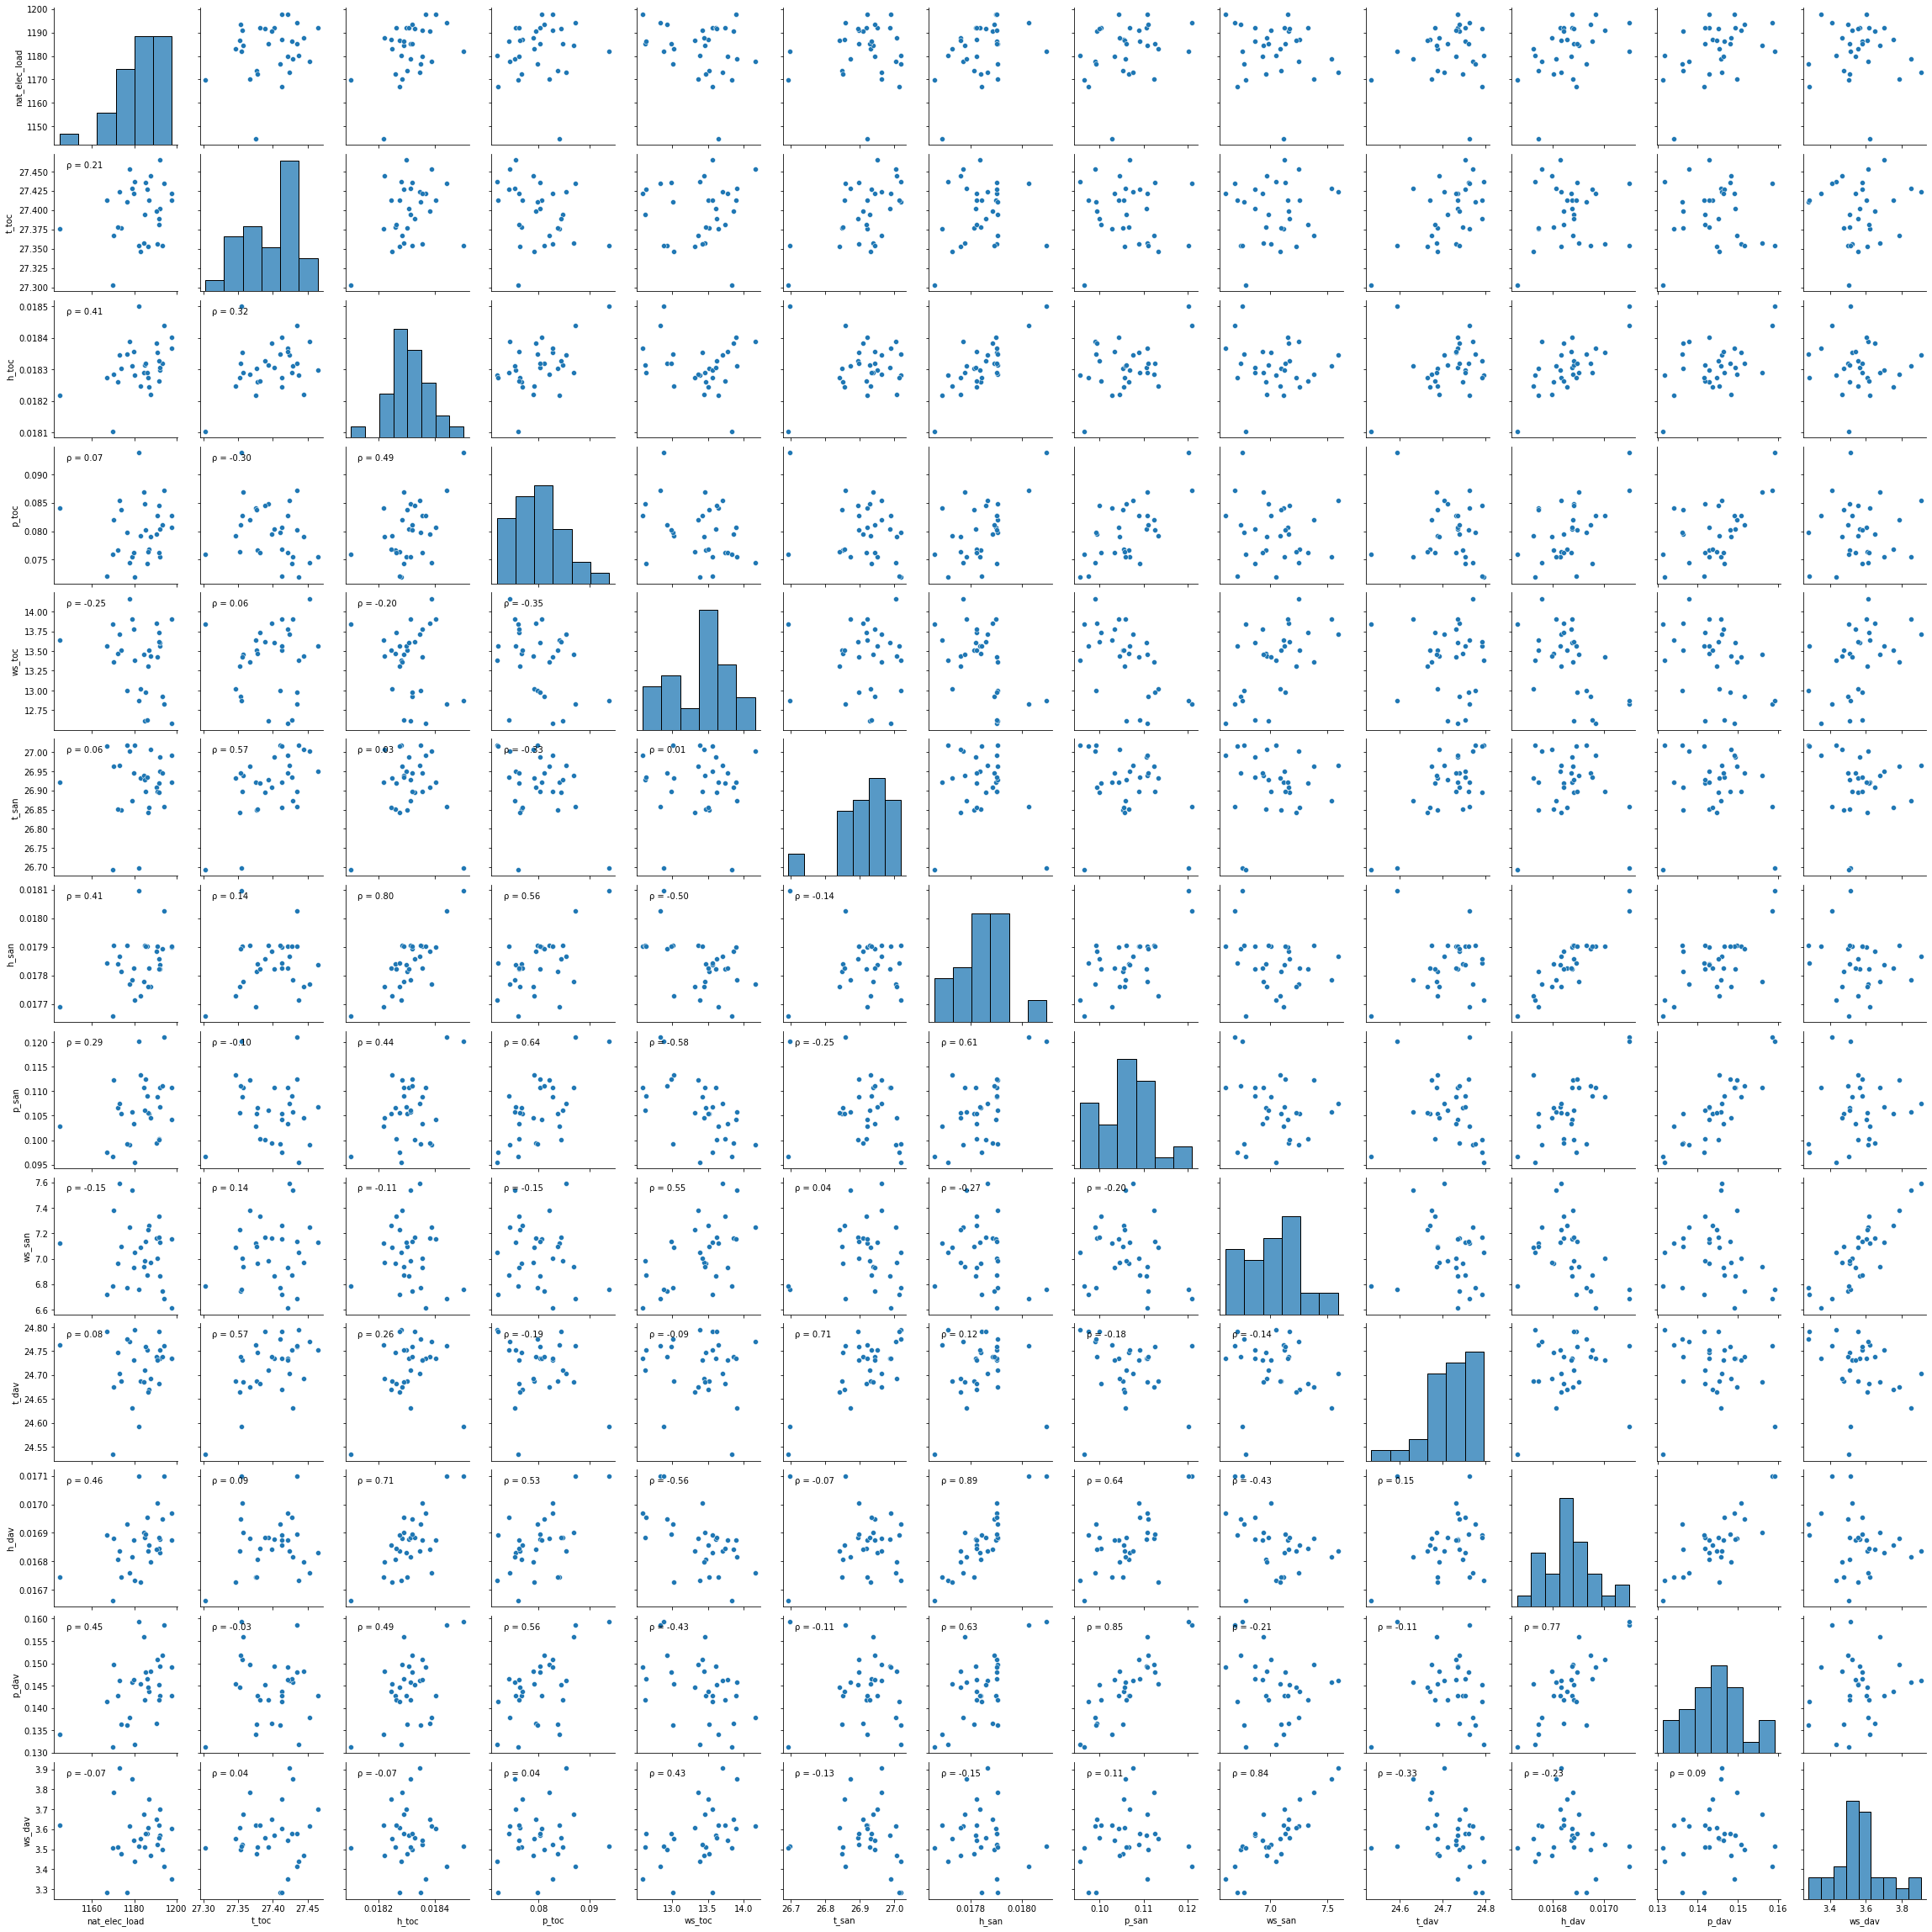

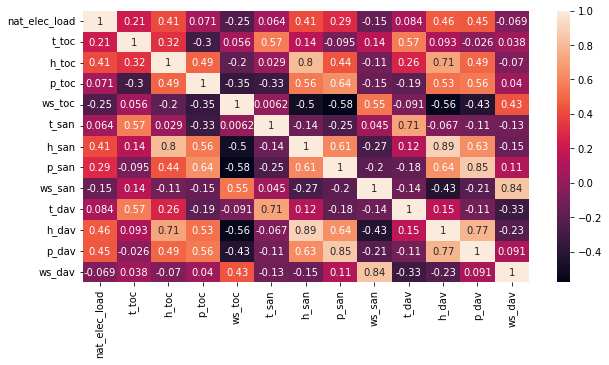

In [9]:
# Visualization of the relation between features daily
g = sns.pairplot(data_daily)
g.map_lower(corrfunc)
plt.show()


# Fora better visualization of correlation between features
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(data_daily.corr(), annot = True, ax = ax)
plt.show()

### Some insights - On a daily basis:
- Electricity load still do not have a significant correlation factor with any feature of the dataset.

- Most relation are weaken when features are considered on a daily basis, but some moderate correlation still persist:
    - Between humidity levels in Santiago and Tocumen (0.80).
    - Between humidity levels in David City and Santiago (0.89).
    - Between precipitations in David City and Santiago (0.85).
    - Between wind speed of David City and Santiago (0.85).

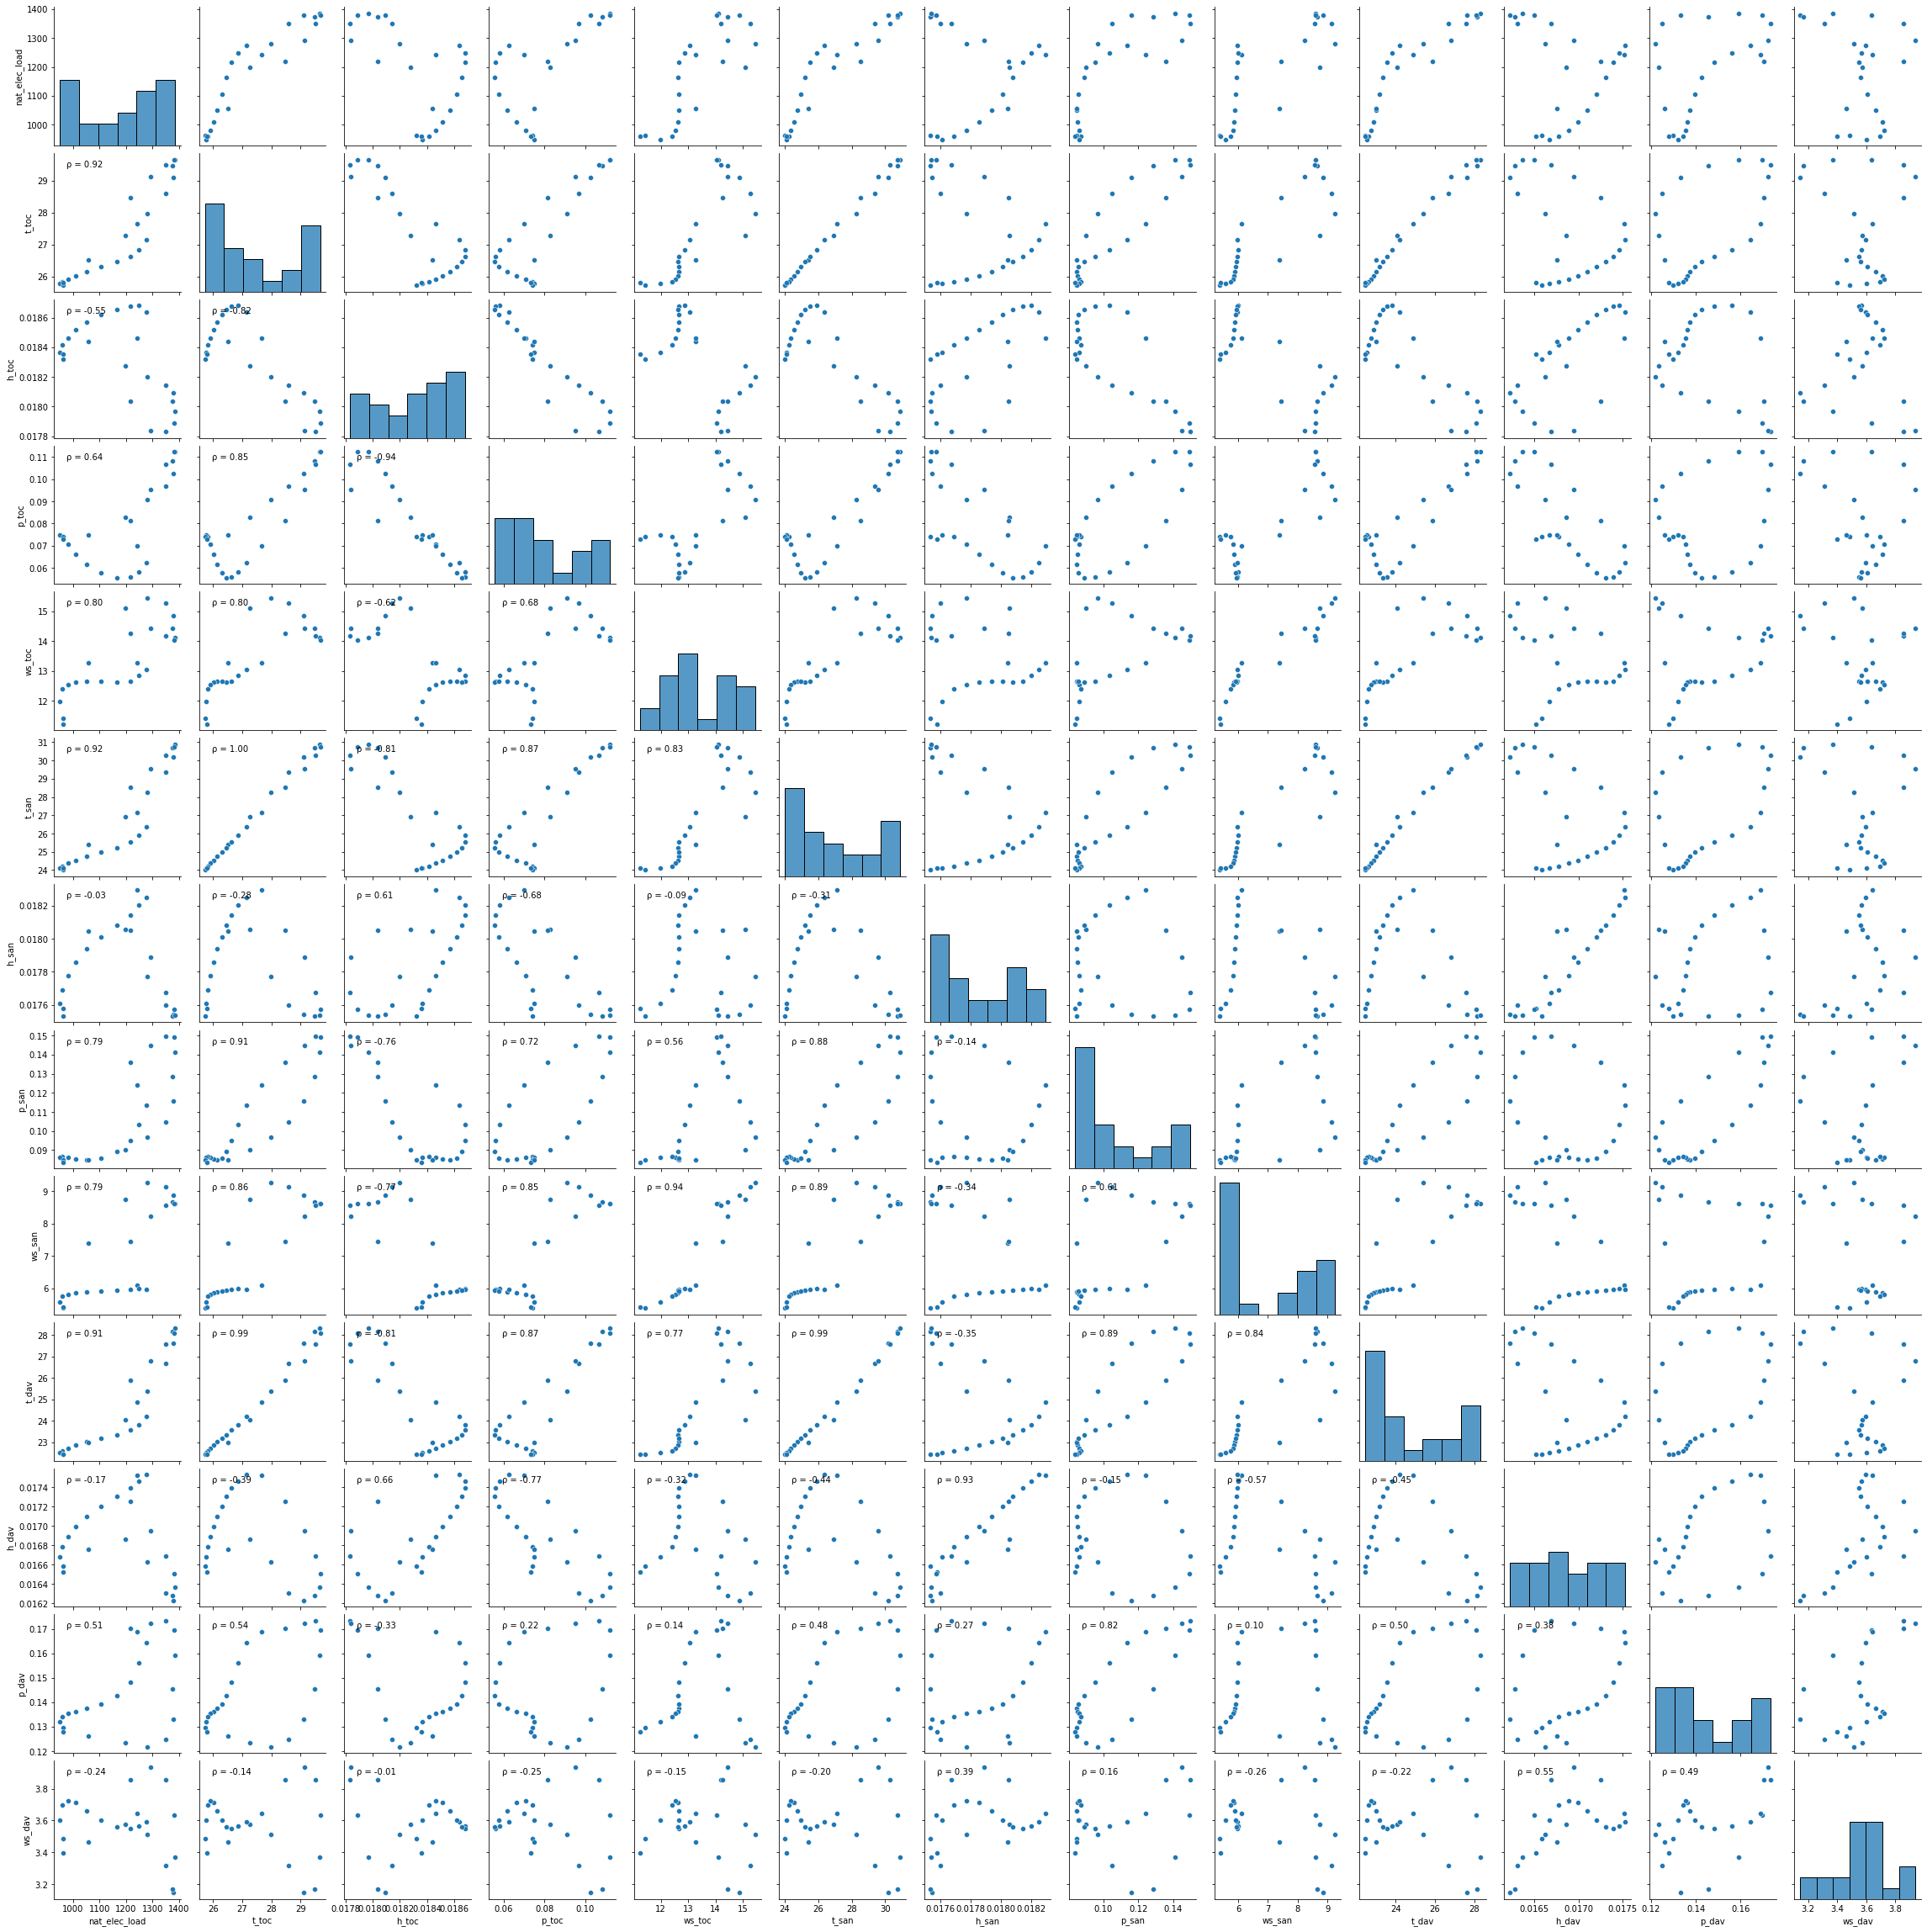

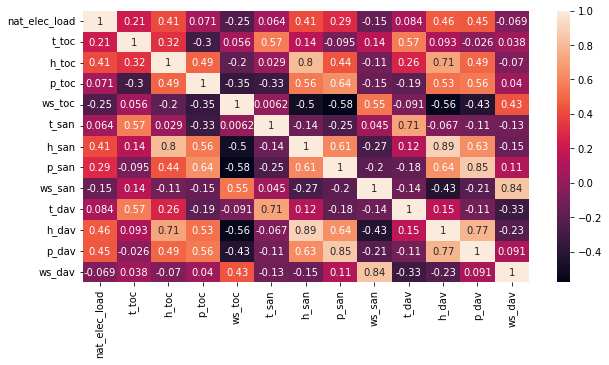

In [10]:
# Visualization of the relation between features hourly
g = sns.pairplot(data_hourly)
g.map_lower(corrfunc)
plt.show()
# Oh!


# Fora better visualization of correlation between features
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(data_daily.corr(), annot = True, ax = ax)
plt.show()

### Some insights - Hourly basis
- Relation between features are definitely more complexes on a hourly basis, with a strong cyclicality.

- We can now see correlation between electricity load and the temperatures of all 3 cities (Tocumen: 0.92; Santiago: 0.92; David City: 0.91).

- There is again a very strong correlation between temperatures in Tocumen and Santiago (1.00), between Tocumen and David City (0.99), and also between Santiago and David City (0.99).

- There is a strong correlation between humidity and precipitation in Tocumen (-0.94).

- There is a strong correlation between wind speed in Tocument and Santiago (0.94).

- Humidity in David City and Santiago are also correlated (0.93).

In [11]:
# Preparing the data to apply seasonal_decompose
data.datetime = pd.to_datetime(data.datetime)
data = data.set_index("datetime")
elec = data.nat_elec_load

In [12]:
# Resampling to have a weekly resolution
elec_w = elec.resample("w").sum()
elec_w

datetime
2015-01-04     48788.0978
2015-01-11    181919.6224
2015-01-18    188082.3152
2015-01-25    179448.7184
2015-02-01    184393.4256
                 ...     
2020-05-31    179611.6882
2020-06-07    186387.8551
2020-06-14    181982.0019
2020-06-21    186222.4516
2020-06-28    138692.3229
Freq: W-SUN, Name: nat_elec_load, Length: 287, dtype: float64

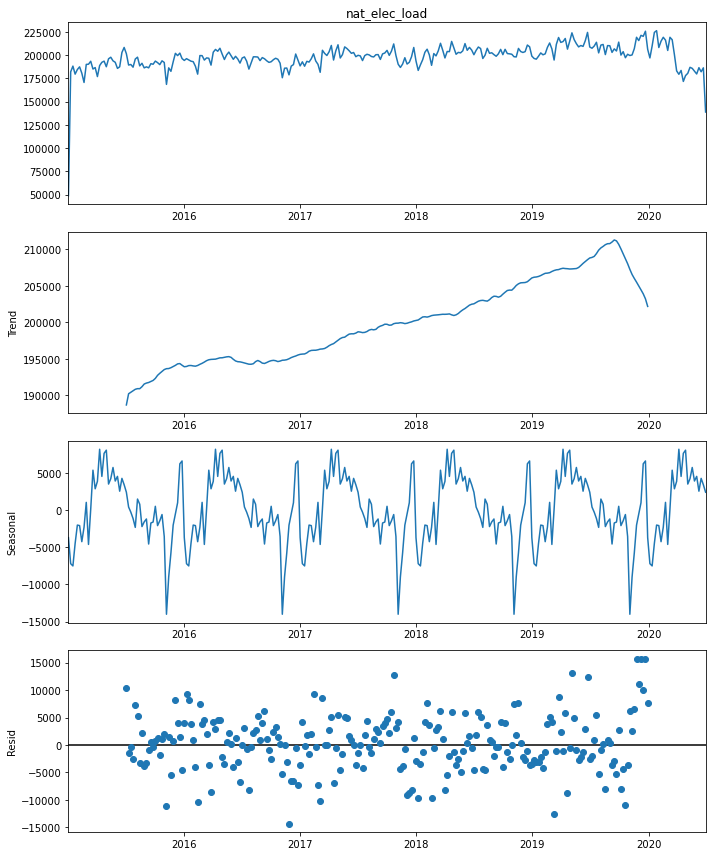

In [15]:
# Decomposing the time series
seasonal_decomp = seasonal_decompose(elec_w, model="additive")
fig = seasonal_decomp.plot()
fig.set_size_inches((10, 12))
fig.tight_layout()
plt.show()

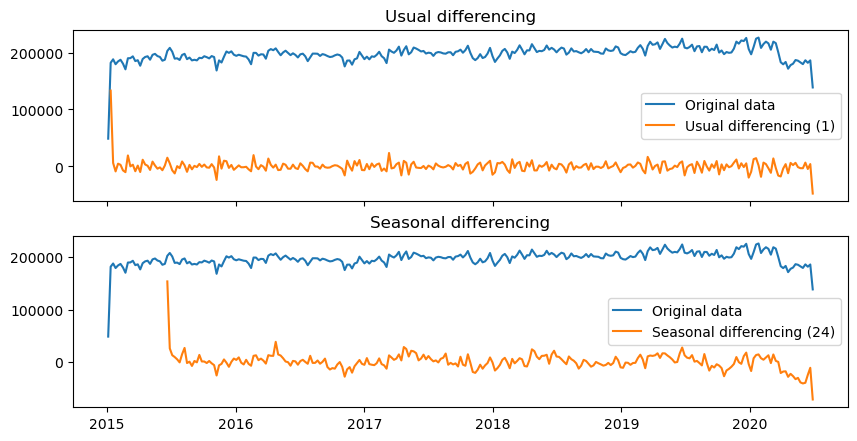

In [39]:
# Looking for seasonality in the data
fig, axes = plt.subplots(2,1, figsize = (10,5), dpi = 100, sharex = True)

axes[0].plot(elec_w[:], label = 'Original data')
axes[0].plot(elec_w[:].diff(1), label = 'Usual differencing (1)')
axes[0].set_title('Usual differencing')
axes[0].legend(fontsize = 10)

axes[1].plot(elec_w[:], label = 'Original data')
axes[1].plot(elec_w[:].diff(24), label = 'Seasonal differencing (24)')
axes[1].set_title('Seasonal differencing')
axes[1].legend(fontsize = 10)

plt.show()

There doesn't seem to be any saisonality in the data.

In [14]:
# Now looking at the occurence of each type of holiday ID per year.
# Preparing the dataset.
holiday_yearly = data.groupby(['holiday_ID', 'year'])['holiday_ID'].count().unstack('year').fillna(0)
holiday_yearly = holiday_yearly.iloc[1: , :]
holiday_yearly = holiday_yearly.div(24)

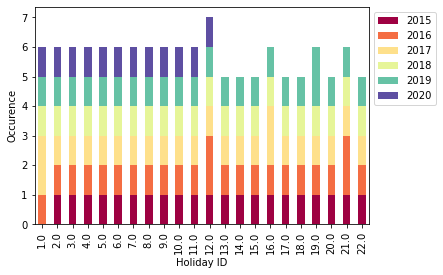

In [15]:
# Visualizing the data.
cmap = cm.get_cmap('Spectral')

holiday_yearly.plot(kind='bar', stacked=True, cmap=cmap)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Occurence')
plt.xlabel('Holiday ID')
plt.show()

### Some insights - Holiday_ID
- There is the same number of holiday type each year, except for ID1 (not in 2015), ID12 (doubled in 2016), ID16 (doubled in 2017) and ID21 (doubled in 2016).
- This feature is not uniform from year to year and hence provide information.
- Note that 2020 data are incomplete.

In [16]:
# Now looking at the number of school day per year.
school_yearly = data.groupby(['school', 'year'])['school'].count().unstack('year')
school_yearly = school_yearly.div(24).round()
school_yearly.loc['Total'] = school_yearly.sum()
school_yearly

year,2015,2016,2017,2018,2019,2020
school,,,,,,
0.0,89.0,92.0,98.0,98.0,98.0,70.0
1.0,274.0,274.0,267.0,267.0,267.0,108.0
Total,363.0,366.0,365.0,365.0,365.0,178.0


### Some insights - Holiday_ID
- The number of school days is not constant through the year.
- We can see that 2015 is incomplete and 2016 have 366 days.

### Colinearity
- Features for all 3 cities may be collinear and action may need to be taken to avoid redundancy and improve modeling results. Tests will need to be done.

In [17]:
# Saving data
data.to_csv('capstone3_data_EDA.csv')